# Data Card

CLIENTNUM – Unique identifier for each customer.

Attrition_Flag – Customer churn status (Existing Customer or Attrited Customer).

Customer_Age – Age of the customer in years.

Gender – Gender of the customer (M or F).

Dependent_count – Number of dependents the customer has.

Education_Level – Customer’s highest education level.

Marital_Status – Marital status of the customer.

Income_Category – Customer’s annual income bracket.

Card_Category – Type of credit card held (Blue, Silver, Gold, Platinum).

Months_on_book – Tenure of the customer with the bank (in months).

Total_Relationship_Count – Number of products the customer has with the bank.

Months_Inactive_12_mon – Number of inactive months in the last 12 months.

Contacts_Count_12_mon – Number of contacts made in the last 12 months.

Credit_Limit – Credit card limit assigned to the customer.

Total_Revolving_Bal – Total revolving balance on the card.

Avg_Open_To_Buy – Average available credit to spend (Credit_Limit - Revolving Balance).

Total_Amt_Chng_Q4_Q1 – Ratio of transaction amount in Q4 over Q1.

Total_Trans_Amt – Total transaction amount in the last 12 months.

Total_Trans_Ct – Total number of transactions in the last 12 months.

Total_Ct_Chng_Q4_Q1 – Ratio of transaction count in Q4 over Q1.

Avg_Utilization_Ratio – Average utilization ratio of the credit card (balance ÷ limit).

# data ingestion & first audit

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency

from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('../data/raw/BankChurners.csv')
#df_backup = df.copy()


In [6]:
df.shape

(10127, 23)

In [7]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [3]:
# drop the last two columns which are not needed for analysis
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
         axis=1, inplace=True)

In [6]:
df.describe(include='object')

Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127           10127          10127   
unique                  2      2               7              4   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count            10127         10127  
unique               6             4  
top     Less than $40K          Blue  
freq              3561          9436

In [7]:
df.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [9]:
df['Dependent_count'].value_counts()

Dependent_count
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: count, dtype: int64


#### Numerical Features
- **Customer_Age**: 75%, ranging from 26 to 52.
- **Dependent_count**: Most customers have 2-3 dependents (min: 0, max: 5).
- **Credit_Limit**: Mean credit limit is ~$8,700 which is almost twice the median (skewness), with a wide range ($1,438–$34,900).
- **Total_Revolving_Bal**: Majority have balances below $2,500, but some reach up to $2,517.
- **Avg_Open_To_Buy**: Average available credit is ~$7,500; some have no available credit.
- **Total_Trans_Amt & Total_Trans_Ct**: High variability in transaction amounts and counts, indicating diverse spending patterns.
- **Avg_Utilization_Ratio**: Low average utilization (~0.27), suggesting most customers use a small portion of their credit.

#### Categorical Features
- **Attrition_Flag**: Most customers are existing; attrited customers form a minority.
- **Gender**: Fairly balanced distribution between male and female.
- **Education_Level**: Diverse education backgrounds; 'Graduate' and 'High School' are common.
- **Marital_Status**: Majority are married, followed by single and unknown status.
- **Income_Category**: Most customers fall into '$40K - $60K' and 'Less than $40K' brackets.
- **Card_Category**: 'Blue' card is predominant; other categories (Silver, Gold, Platinum) are less common.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

# Business Questions & Analysis Plan
### Overall Churn Profile

1. What is the overall churn rate?
2. How many customers are attrited vs existing?

### Does age affect churn likelihood (young vs old)?

1. Is there a difference in churn between genders?
2. How does dependent_count (family responsibility) relate to churn?

### Socioeconomic Factors & Churn

1. Does churn vary by education level?
2. Does income category affect churn (low vs high income)?
3. Does marital status play a role in churn?

### How does churn differ across card categories (Blue, Silver, Gold, Platinum)?

1. Does total relationship count (number of products held) reduce churn?
2. Does longer tenure (months_on_book) make customers more loyal?

### Engagement & Activity Patterns

1. Do inactive months increase churn probability?
2. Does contacts count in 12 months reduce churn, or is it a frustration signal?
3. Are churned customers transacting less frequently (Total_Trans_Ct)?

### Financial Behavior & Churn

1. Does credit limit level affect churn?
2. Does revolving balance (debt carried) relate to churn?
3. Do customers with high utilization ratio churn more?

### Spending Trends & Churn

1. Do churned customers spend less in total (Total_Trans_Amt)?
2. How does change in transaction amount (Q4/Q1) differ between churned and retained?
3. How does change in transaction count (Q4/Q1) differ between churned and retained?

### Early Warning Indicators

1. Which variables are most strongly associated with churn?
2. Can we outline a profile of a high-risk customer (demographic + behavior + financial)?

### Actionable Recommendations

1. Which customer groups should we target with retention strategies?


------------------------------------------------


# Big picture insights

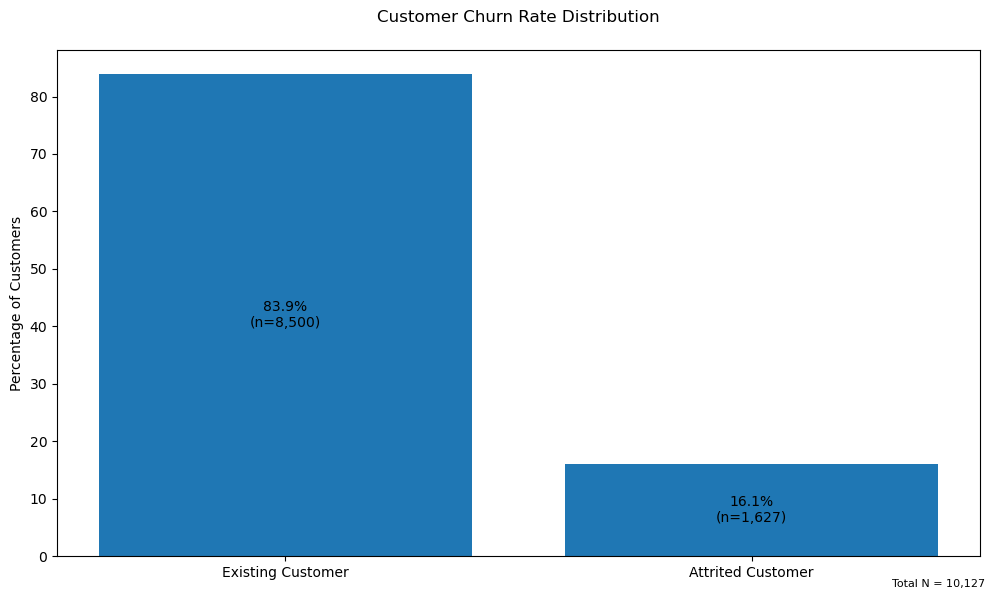


Churn Rate Summary:
--------------------------------------------------
Total Customers: 10,127
Churned Customers: 1,627
Overall Churn Rate: 16.1%


In [9]:
# Calculate overall churn rate
churn_rate = df['Attrition_Flag'].value_counts(normalize=True)
churn_counts = df['Attrition_Flag'].value_counts()

# Create figure with both percentage and count
fig, ax = plt.subplots(figsize=(10, 6))

# Plot percentage bars
bars = ax.bar(churn_rate.index, churn_rate * 100)

# Annotate percentages and counts
for i, (pct, cnt) in enumerate(zip(churn_rate, churn_counts)):
    ax.text(i, pct*100/2, 
            f'{pct*100:.1f}%\n(n={cnt:,})',
            ha='center', va='center')

# Customize plot
ax.set_title('Customer Churn Rate Distribution', pad=20)
ax.set_ylabel('Percentage of Customers')
plt.xticks(rotation=0)

# Add sample size in bottom right
plt.figtext(0.99, 0.01, f'Total N = {len(df):,}', 
            ha='right', va='bottom', fontsize=8)

# Display plot
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nChurn Rate Summary:")
print("-" * 50)
print(f"Total Customers: {len(df):,}")
print(f"Churned Customers: {churn_counts['Attrited Customer']:,}")
print(f"Overall Churn Rate: {churn_rate['Attrited Customer']*100:.1f}%")# Demographic Risk Analysis



In [5]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [5]:
# Create age bins
df['Age_Group'] = pd.cut(df['Customer_Age'], 
                        bins=[26 ,36, 46, 56, 100],
                        labels=['26-35', '36-45', '46-55', '55+'])

# Separate features into categorical and numerical
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Age_Group',
                       'Income_Category', 'Card_Category',]
numerical_features = ['Customer_Age', 'Dependent_count', 'Months_on_book',
                     'Total_Relationship_Count', 'Months_Inactive_12_mon',
                     'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                     'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct',
                     'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 
                     'Avg_Utilization_Ratio']



- Chi-square: checks whether a categorical group (e.g., education, income, card type) has different churn behavior than other groups. If the test is strong, it means churn is unevenly spread across categories (not necessarily why).
- Score (−log10(p)): a simple way to turn the test result into a rankable number — higher = stronger evidence that the category matters for churn.
- Point-biserial (for numbers like age or credit limit): shows how strongly a continuous measure is linked to churn. The sign tells direction (positive → higher values go with more churn; negative → higher values go with less churn). The size tells how strong that link is.
- Quick take: bigger scores mean a clearer association. These are clues, not proof of cause. Small groups or looking at many variables can give misleading results, so use these findings as signals to investigate further.


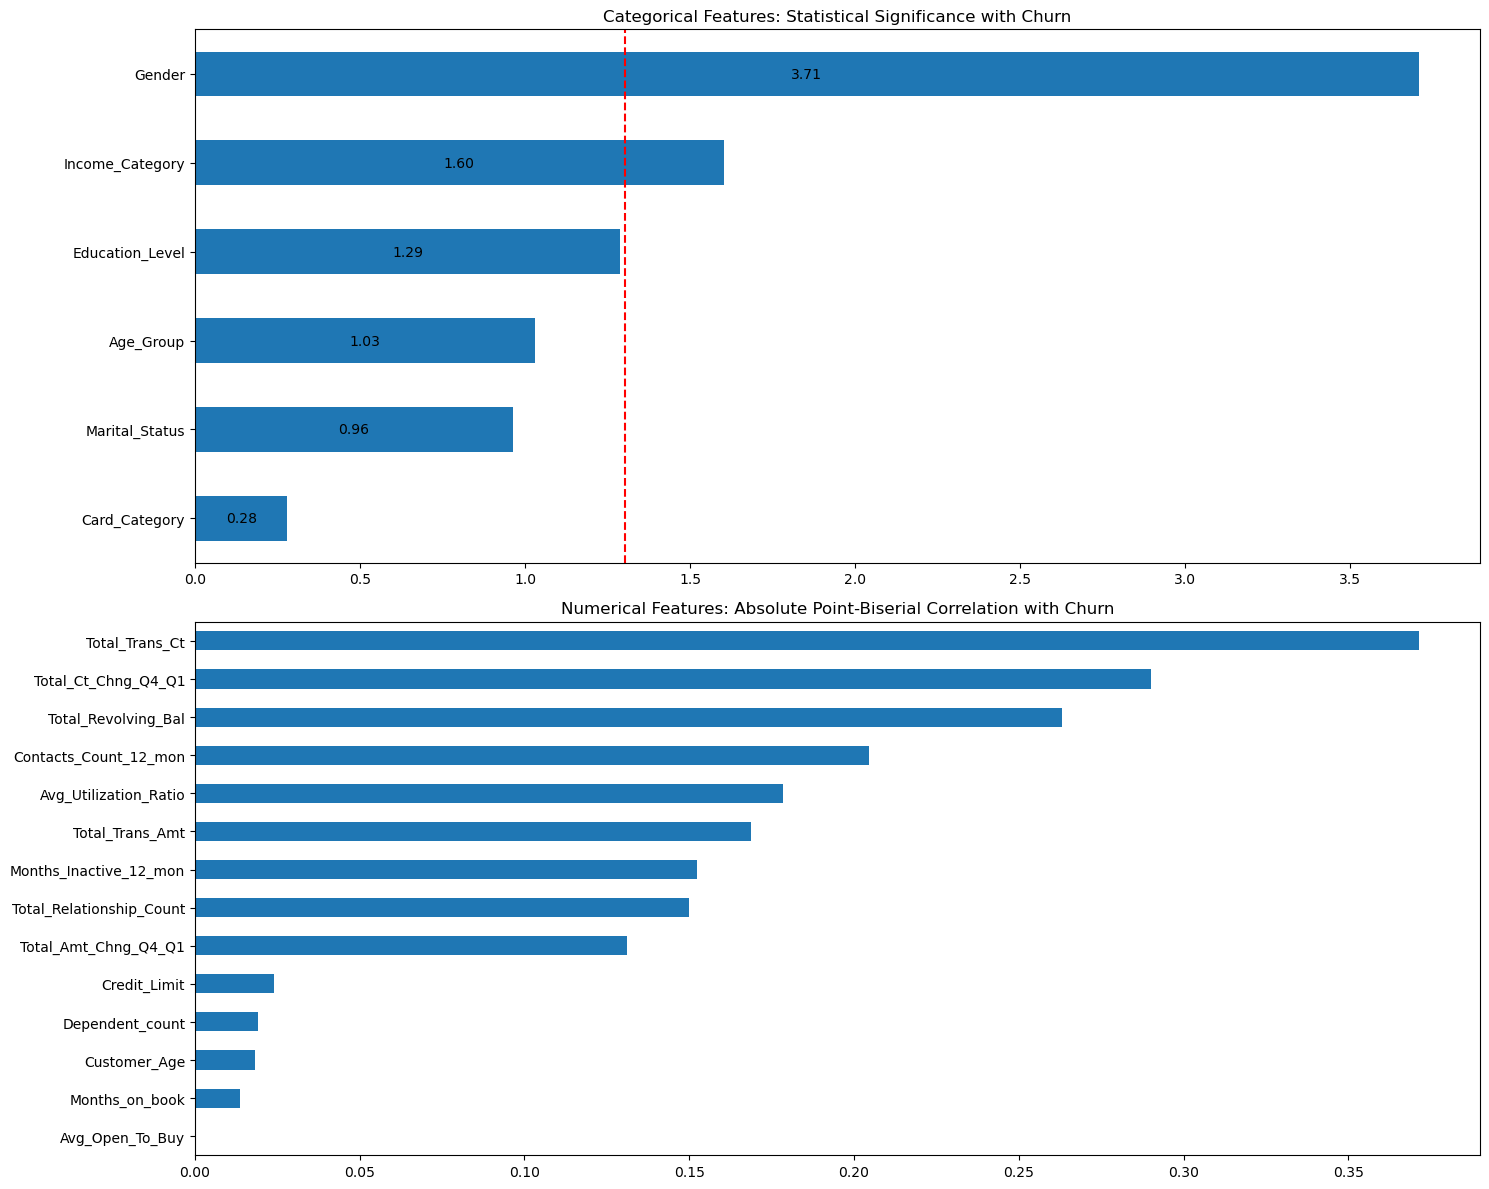

point_biserial_corr
Total_Trans_Ct                         -0.371
Total_Ct_Chng_Q4_Q1                    -0.290
Total_Revolving_Bal                    -0.263
Contacts_Count_12_mon                   0.204
Avg_Utilization_Ratio                  -0.178
Total_Trans_Amt                        -0.169
Months_Inactive_12_mon                  0.152
Total_Relationship_Count               -0.150
Total_Amt_Chng_Q4_Q1                   -0.131
Credit_Limit                           -0.024
Dependent_count                         0.019
Customer_Age                            0.018
Months_on_book                          0.014
Avg_Open_To_Buy                        -0.000

In [ ]:



# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))


# 1. Categorical Features: Chi-square test
chi_square_results = {}
for cat_feature in categorical_features:
    contingency = pd.crosstab(df[cat_feature], df['Attrition_Flag'])
    chi2, p_val, _, _ = chi2_contingency(contingency)
    chi_square_results[cat_feature] = {'chi2': chi2, 'p_value': p_val}

# Plot chi-square statistics
cat_stats = pd.DataFrame(chi_square_results).T
cat_stats['-log10(p)'] = -np.log10(cat_stats['p_value'])
sorted_cat_stats = cat_stats['-log10(p)'].sort_values(ascending=True)

# Create horizontal bar plot for categorical features
sorted_cat_stats.plot(kind='barh', ax=ax1)
ax1.set_title('Categorical Features: Statistical Significance with Churn')
ax1.axvline(-np.log10(0.05), color='r', linestyle='--', label='p=0.05 threshold')

# Add value labels inside bars
for i, v in enumerate(sorted_cat_stats):
    ax1.text(v/2, i, f'{v:.2f}', ha='center', va='center')

# 2. Numerical Features: Point-Biserial Correlation with churn
churn_binary = (df['Attrition_Flag'] == 'Attrited Customer').astype(int)
pb_correlations = {}
for num_feature in numerical_features:
    corr, _ = pointbiserialr(churn_binary, df[num_feature])
    pb_correlations[num_feature] = corr

# Sort by absolute correlation and plot
abs_pb_corr = pd.Series(pb_correlations).abs().sort_values(ascending=True)
abs_pb_corr.plot(kind='barh', ax=ax2)
ax2.set_title('Numerical Features: Absolute Point-Biserial Correlation with Churn')



plt.tight_layout()
plt.show()

# Create styled tables
def style_negative(v):
    return 'color: red' if v < 0 else 'color: green'

# Categorical features table
cat_table = pd.DataFrame(chi_square_results).T
cat_table = cat_table.sort_values('chi2', ascending=False)
cat_table = cat_table.round(4)
# Display categorical features association table
cat_table

# Display numerical features point-biserial correlation table
num_table = pd.DataFrame(pb_correlations, index=['point_biserial_corr']).T
num_table = num_table.sort_values('point_biserial_corr', key=abs, ascending=False)
num_table = num_table.round(3)
num_table



In [10]:
cat_table

chi2  p_value
Gender           13.8656   0.0002
Income_Category  12.8323   0.0250
Education_Level  12.5112   0.0515
Age_Group         6.4032   0.0936
Marital_Status    6.0561   0.1089
Card_Category     2.2342   0.5252

most influential features on churn are:
categorical features:

1. gender
2. income category
3. education level
------------------------------------------------
numerical features:

1. total transaction count
2. total ct change q4 q1
3. total revolving balance



# Demographic Risk Analysis

Analyzing churn patterns across key categorical variables:
- most influential:
1. gender
2. income category
3. education level
     


For each demographic factor we'll:
1. the churners distribution (% of each category to the total churners)
2. Visualize the distributions
3. Perform statistical testing where appropriate
4. Identify high-risk segments 
5. Calculate churn rates by group

In [4]:
churned_df = df[df['Attrition_Flag'] == 'Attrited Customer']
total_churners = len(churned_df)
churned_df.head()


CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
21  708508758  Attrited Customer            62      F                0   
39  708300483  Attrited Customer            66      F                0   
51  779471883  Attrited Customer            54      F                1   
54  714374133  Attrited Customer            56      M                2   
61  712030833  Attrited Customer            48      M                2   

   Education_Level Marital_Status Income_Category Card_Category  \
21        Graduate        Married  Less than $40K          Blue   
39       Doctorate        Married         Unknown          Blue   
51        Graduate        Married  Less than $40K          Blue   
54        Graduate        Married         $120K +          Blue   
61        Graduate        Married     $60K - $80K        Silver   

    Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
21              49  ...                       3                      3   
39              56  ...                       4                      3   
51              40  ...                       3                      1   
54              36  ...                       3                      3   
61              35  ...                       4                      4   

    Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
21        1438.3                    0           1438.3                 1.047   
39        7882.0                  605           7277.0                 1.052   
51        1438.3                  808            630.3                 0.997   
54       15769.0                    0          15769.0                 1.041   
61       34516.0                    0          34516.0                 0.763   

    Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
21              692              16                0.600   
39              704              16                0.143   
51              705              19                0.900   
54              602              15                0.364   
61              691              15                0.500   

    Avg_Utilization_Ratio  
21                  0.000  
39                  0.077  
51                  0.562  
54                  0.000  
61                  0.000  

[5 rows x 21 columns]

## education level analysis

In [7]:


pivot_edu = pd.pivot_table(
    churned_df,
    index='Education_Level',
    values='CLIENTNUM',
    aggfunc='count'
).rename(columns={'CLIENTNUM': 'churners'})

group_totals = df.groupby('Education_Level')['CLIENTNUM'].count()
pivot_edu['total_in_group'] = group_totals
pivot_edu['churn_rate'] = (pivot_edu['churners'] / pivot_edu['total_in_group'] * 100).round(2)
pivot_edu['pct_of_total_churners'] = (pivot_edu['churners'] / total_churners * 100).round(2)

pivot_edu = pivot_edu.sort_values('churners', ascending=False)



### seaborn.

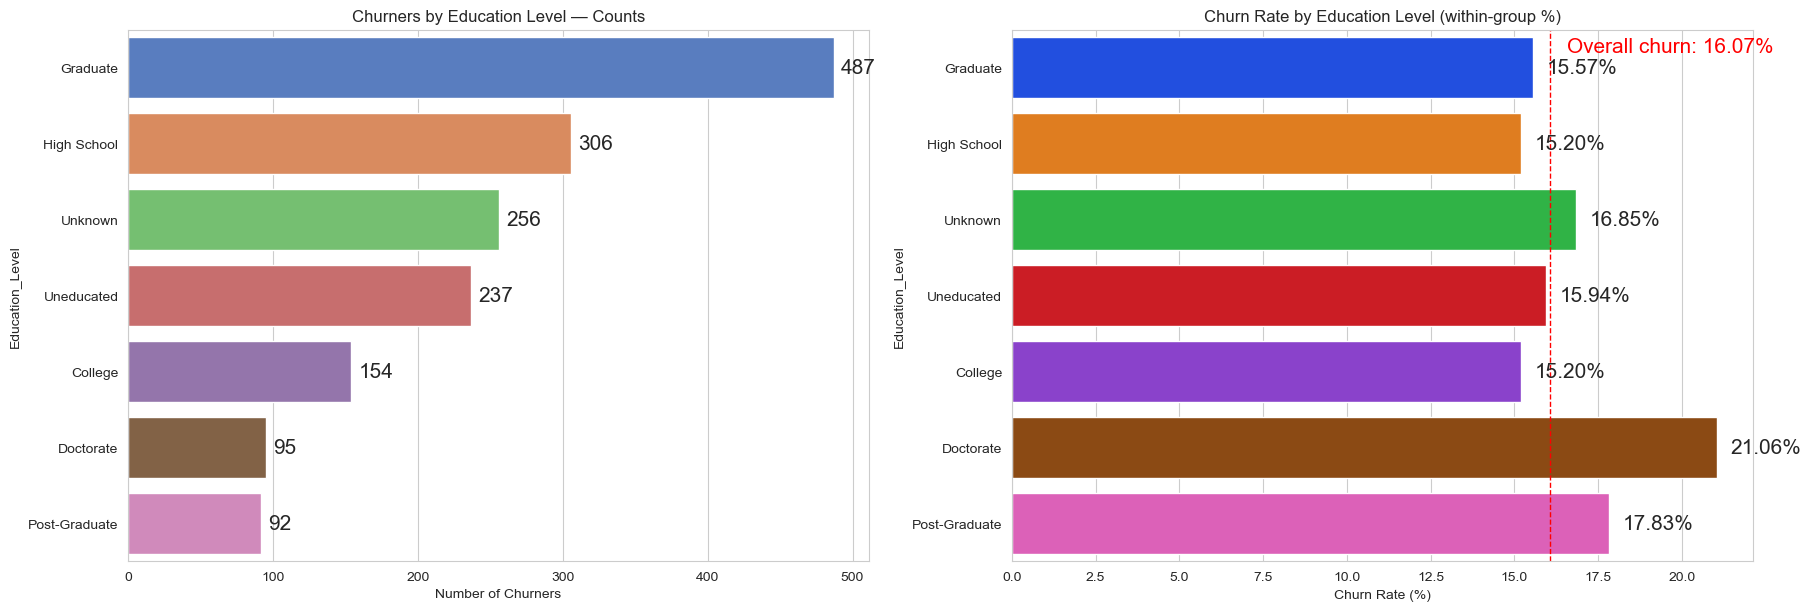

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(18, 6), constrained_layout=True)
sns.set_style("whitegrid")
data_edu = pivot_edu.reset_index()

# Left: churners counts (horizontal)
ax = axes[0]
sns.barplot(x='churners', y='Education_Level', data=data_edu, palette='muted', ax=ax, orient='h')
ax.set_title("Churners by Education Level — Counts")
ax.set_xlabel("Number of Churners")
for i, row in data_edu.iterrows():
    ax.text(row['churners'] + max(data_edu['churners']) * 0.01, i, f"{int(row['churners']):,}", va='center', fontsize=15)

# Right: churn rate within group (horizontal)
ax = axes[1]
sns.barplot(x='churn_rate', y='Education_Level', data=data_edu, palette='bright', ax=ax, orient='h')
ax.set_title("Churn Rate by Education Level (within-group %)")
ax.set_xlabel("Churn Rate (%)")
baseline = len(churned_df) / len(df) * 100
ax.axvline(baseline, color='red', linestyle='--', linewidth=1)
ax.text(baseline + 0.5, -0.2, f"Overall churn rate: {baseline:.2f}%", color='red', fontsize=15)
for i, row in data_edu.iterrows():
    ax.text(row['churn_rate'] + 0.4, i, f"{row['churn_rate']:.2f}%", va='center', fontsize=15)

plt.show()


### plotly

In [8]:

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Churners by Education Level (count & share)", "Churn Rate by Education Level (within-group %)"))

fig.add_trace(
    go.Bar(
        x=pivot_edu.index,
        y=pivot_edu['churners'],
        text=pivot_edu['churners'].map("{:,}".format),
        customdata=pivot_edu[['pct_of_total_churners']].values,
        hovertemplate="<b>%{x}</b><br>Churners: %{y:,}<br>Share of total churners: %{customdata[0]}%"
    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
        x=pivot_edu.index,
        y=pivot_edu['churn_rate'],
        text=pivot_edu['churn_rate'].map(lambda v: f"{v:.2f}%"),
        hovertemplate="<b>%{x}</b><br>Churn Rate: %{y:.2f}%"
    ),
    row=1, col=2
)

baseline = len(churned_df) / len(df) * 100
fig.add_hline(y=baseline, line=dict(color="red", dash="dash"), row=1, col=2)
fig.add_annotation(x=0.46, y=baseline, xref='x2 domain', yref='y2',
                   text=f"Overall churn: {baseline:.2f}%", showarrow=False,
                   font=dict(color="red"), xanchor='right', yshift=22)

fig.update_layout(template="plotly_white", title_text="Education Level Churn Overview", width=850, height=500, showlegend=False)
fig.update_yaxes(title_text="Churners", row=1, col=1)
fig.update_yaxes(title_text="Churn Rate (%)", row=1, col=2)
fig.show()


In [53]:
pivot_edu

churners  total_in_group  churn_rate  pct_of_total_churners
Education_Level                                                             
Graduate              487            3128       15.57                  29.93
High School           306            2013       15.20                  18.81
Unknown               256            1519       16.85                  15.73
Uneducated            237            1487       15.94                  14.57
College               154            1013       15.20                   9.47
Doctorate              95             451       21.06                   5.84
Post-Graduate          92             516       17.83                   5.65

Majority of churners are graduates
more than 21% of doctorate holders, 17% of other postgraduates, churn

so those are the most priortize education levels to target for retention strategies

## income category churn analysis

In [9]:


pivot_income = pd.pivot_table(
    churned_df,
    index='Income_Category',
    values='CLIENTNUM',
    aggfunc='count'
).rename(columns={'CLIENTNUM': 'churners'})

group_totals = df.groupby('Income_Category')['CLIENTNUM'].count()
pivot_income['total_in_group'] = group_totals
pivot_income['churn_rate'] = (pivot_income['churners'] / pivot_income['total_in_group'] * 100).round(2)
pivot_income['pct_of_total_churners'] = (pivot_income['churners'] / total_churners * 100).round(2)

pivot_income = pivot_income.sort_values('churners', ascending=False)
pivot_income

churners  total_in_group  churn_rate  pct_of_total_churners
Income_Category                                                             
Less than $40K        612            3561       17.19                  37.62
$40K - $60K           271            1790       15.14                  16.66
$80K - $120K          242            1535       15.77                  14.87
$60K - $80K           189            1402       13.48                  11.62
Unknown               187            1112       16.82                  11.49
$120K +               126             727       17.33                   7.74

### seaborn.

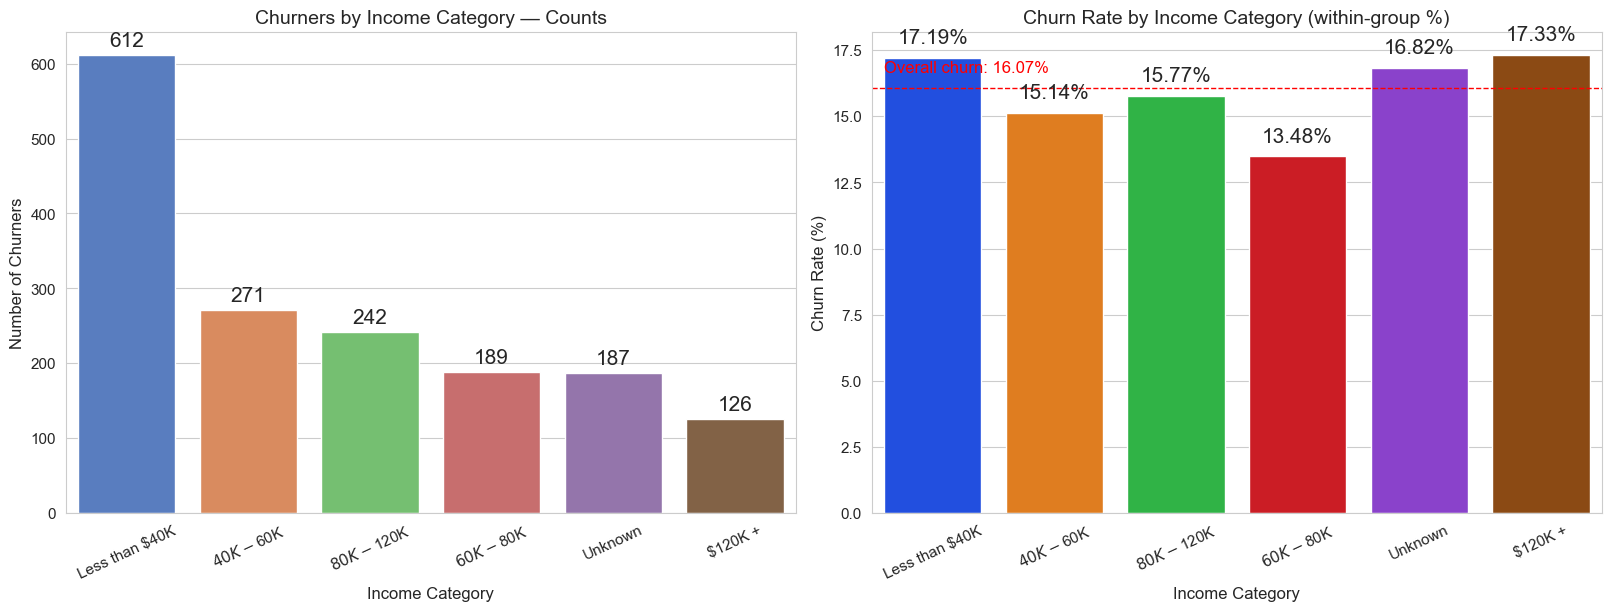

In [ ]:


fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)
sns.set_style("whitegrid")
data_inc = pivot_income.reset_index()

# Left: churners counts
ax = axes[0]
sns.barplot(x='Income_Category', y='churners', data=data_inc, palette='muted', ax=ax)
ax.set_title("Churners by Income Category — Counts", fontsize=14)
ax.set_xlabel("Income Category", fontsize=12)
ax.set_ylabel("Number of Churners", fontsize=12)
ax.tick_params(axis='x', rotation=25, labelsize=11)
ax.tick_params(axis='y', labelsize=11)
for i, row in data_inc.iterrows():
    ax.text(i, row['churners'] + max(data_inc['churners']) * 0.01,
            f"{int(row['churners']):,}", ha='center', va='bottom', fontsize=15)

# Right: churn rate within group
ax = axes[1]
sns.barplot(x='Income_Category', y='churn_rate', data=data_inc, palette='bright', ax=ax)
ax.set_title("Churn Rate by Income Category (within-group %)", fontsize=14)
ax.set_ylabel("Churn Rate (%)", fontsize=12)
ax.set_xlabel("Income Category", fontsize=12)
ax.tick_params(axis='x', rotation=25, labelsize=11)
ax.tick_params(axis='y', labelsize=11)
baseline = len(churned_df) / len(df) * 100
ax.axhline(baseline, color='red', linestyle='--', linewidth=1)
ax.text(-0.4, baseline + 0.6, f"Overall churn: {baseline:.2f}%", color='red', fontsize=12)
for i, row in data_inc.iterrows():
    ax.text(i, row['churn_rate'] + 0.4, f"{row['churn_rate']:.2f}%", ha='center', va='bottom', fontsize=15)

plt.show()


### plotly

In [14]:


fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Churners by Income Category ",
                                    "Churn Rate by Income Category (within-group %)"))

# left: counts with pct_of_total_churners
fig.add_trace(
    go.Bar(
        x=pivot_income.index,
        y=pivot_income['churners'],
        text=pivot_income['churners'].map("{:,}".format),
        customdata=pivot_income[['pct_of_total_churners']].values,
        hovertemplate="<b>%{x}</b><br>Churners: %{y:,}<br>Share of total churners: %{customdata[0]}%"
    ),
    row=1, col=1
)

# right: churn rate (percent)
fig.add_trace(
    go.Bar(
        x=pivot_income.index,
        y=pivot_income['churn_rate'],
        #text=pivot_income['churn_rate'].map(lambda v: f"{v:.2f}%"),
        hovertemplate="<b>%{x}</b><br>Churn Rate: %{y:.2f}%"
    ),
    row=1, col=2
)

baseline = len(churned_df) / len(df) * 100
fig.add_hline(y=baseline, line=dict(color="blue", dash="dash"), row=1, col=2)
fig.add_annotation(x=0.46, y=baseline, xref='x2 domain', yref='y2',
                   text=f"Overall churn: {baseline:.2f}%", showarrow=False,
                   font=dict(color="blue", size=12), xanchor='right', yshift=22)

fig.update_layout(template="plotly_white",
                  title_text="Income Category Churn Overview",
                  title_font=dict(size=16),
                  width=850, height=450, showlegend=False)

fig.update_xaxes(tickfont=dict(size=11))
fig.update_yaxes(title_text="Churners", row=1, col=1, title_font=dict(size=12), tickfont=dict(size=11))
fig.update_yaxes(title_text="Churn Rate (%)", row=1, col=2, title_font=dict(size=12), tickfont=dict(size=11))

fig.show()


In [15]:
pivot_income

churners  total_in_group  churn_rate  pct_of_total_churners
Income_Category                                                             
Less than $40K        612            3561       17.19                  37.62
$40K - $60K           271            1790       15.14                  16.66
$80K - $120K          242            1535       15.77                  14.87
$60K - $80K           189            1402       13.48                  11.62
Unknown               187            1112       16.82                  11.49
$120K +               126             727       17.33                   7.74

37 % of churners have income is less than 40K
17% of customers who have income less than 40K churn
so this is the most prioritized income category segment to target for retention strategies

## gender-level churn analysis

In [41]:
# Pivot table: Gender as rows, number of churners and percentage of total churners as values
pivot_gender = pd.pivot_table(
    df[df['Attrition_Flag'] == 'Attrited Customer'],
    index='Gender',
    values='CLIENTNUM',
    aggfunc='count'
).rename(columns={'CLIENTNUM': 'churners'})
# add total per gender and churn rate (percentage of that gender who churned)
group_totals = df.groupby('Gender')['CLIENTNUM'].count()
pivot_gender['total_in_group'] = group_totals
pivot_gender['churn_rate'] = (pivot_gender['churners'] / pivot_gender['total_in_group'] * 100).round(2)

pivot_gender['pct_of_total_churners'] = (pivot_gender['churners'] / total_churners * 100).round(2)

# Sort for readability
pivot_gender = pivot_gender.sort_values('churners', ascending=False)


pivot_gender

churners  total_in_group  churn_rate  pct_of_total_churners
Gender                                                             
F            930            5358       17.36                  57.16
M            697            4769       14.62                  42.84

### seaborn.

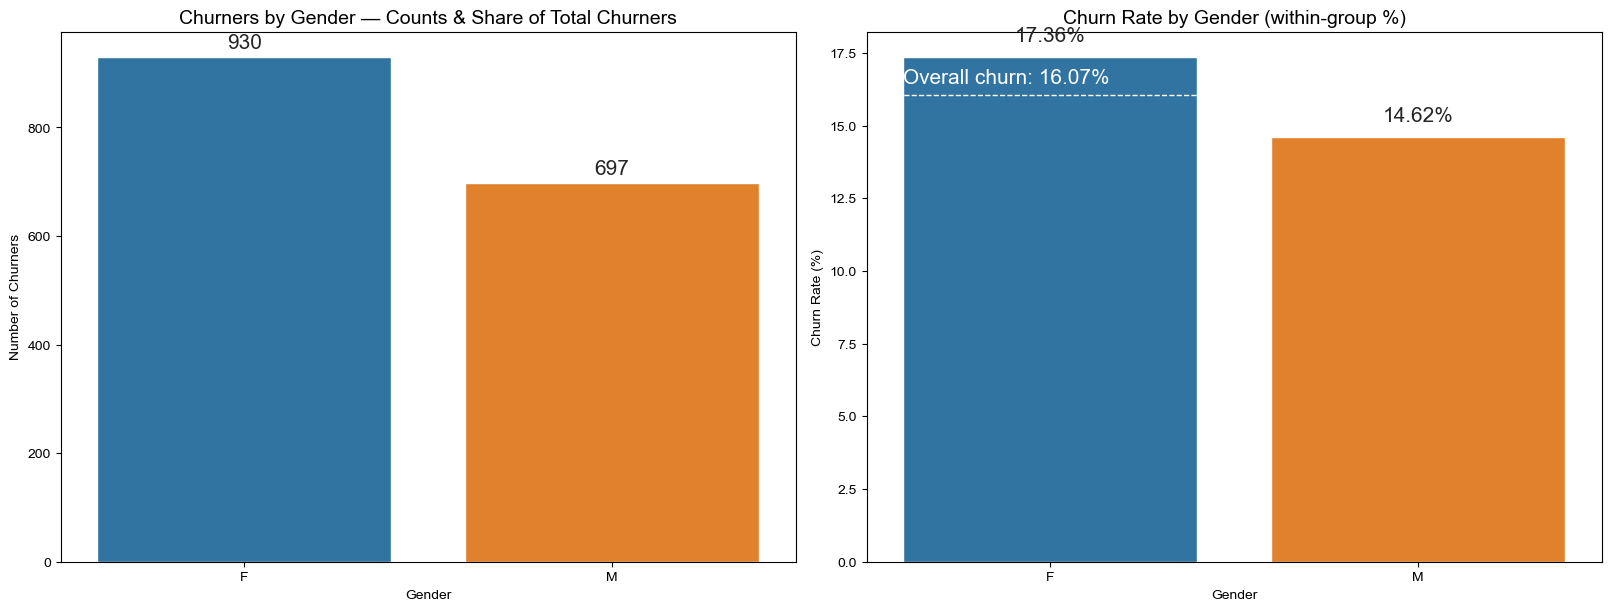

In [42]:
# Seaborn + Matplotlib figure (put this in a new cell)
# Uses existing `pivot_agegroup` DataFrame
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False, constrained_layout=True)
sns.set_style("whitegrid")
palette = sns.color_palette("tab10")

# Left: churners (absolute counts)
ax = axes[0]
data = pivot_gender.reset_index()
sns.barplot(x='Gender', y='churners', data=data, palette=palette, ax=ax)
for i, row in data.iterrows():
    ax.text(i, row['churners'] + max(data['churners']) * 0.01,
            f"{row['churners']:,}",
            ha='center', va='bottom', fontsize=15)
ax.set_title("Churners by Gender — Counts & Share of Total Churners", fontsize=14)
ax.set_ylabel("Number of Churners")
ax.set_xlabel("Gender")

# Right: churn rate (percentage within group)
ax = axes[1]
sns.barplot(x='Gender', y='churn_rate', data=data, palette=palette, ax=ax)
for i, row in data.iterrows():
    ax.text(i, row['churn_rate'] + 0.4,
            f"{row['churn_rate']:.2f}%",
            ha='center', va='bottom', fontsize=15)
# baseline churn line
baseline = (df['Attrition_Flag'] == 'Attrited Customer').mean() * 100
ax.axhline(baseline, color='white', linestyle='--', linewidth=1)
ax.text(-0.4, baseline + 0.4, f"Overall churn: {baseline:.2f}%", color='white', fontsize=15)
ax.set_title("Churn Rate by Gender (within-group %)", fontsize=14)
ax.set_ylabel("Churn Rate (%)")
ax.set_xlabel("Gender")

#plt.suptitle("Gender-Level Churn: Counts vs Within-Group Rate", fontsize=16, y=1.02)
plt.show()



### plotly

In [43]:



fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Churners by Gender (count & share)", "Churn Rate by Gender (within-group %)"))

# left: churners count with secondary text showing pct_of_total_churners
fig.add_trace(
    go.Bar(
        x=pivot_gender.index,
        y=pivot_gender['churners'],
        text=pivot_gender['churners'].map("{:,}".format),
        hovertemplate="<b>%{x}</b><br>Churners: %{y:,}<br>Share of total churners: %{customdata[0]}%",
        customdata=pivot_gender[['pct_of_total_churners']].values,
        marker_color=['#4C78A8', '#F58518']
    ),
    row=1, col=1
)

# right: churn rate
fig.add_trace(
    go.Bar(
        x=pivot_gender.index,
        y=pivot_gender['churn_rate'],
        text=pivot_gender['churn_rate'].map(lambda v: f"{v:.2f}%"),
        hovertemplate="<b>%{x}</b><br>Churn Rate: %{y:.2f}%",
        marker_color=['#54A24B', '#E45756']
    ),
    row=1, col=2
)

# add overall baseline churn as a horizontal line in the second subplot
fig.add_hline(y=baseline, line=dict(color="red", dash="dash"), row=1, col=2)
fig.add_annotation(
    x=0.46, y=baseline,
    xref='x2 domain', yref='y2',
    text=f"Overall churn: {baseline:.2f}%",
    showarrow=False,
    font=dict(color="red"),
    xanchor='right',
    yshift=-12  # move annotation slightly down (pixels)
)

fig.update_layout(
    template="plotly_white",
    title_text="Gender Churn Overview — Counts & Within-Group Rates",
    width=850,
    height=450,
    showlegend=False
)
fig.update_yaxes(title_text="Churners", row=1, col=1)
fig.update_yaxes(title_text="Churn Rate (%)", row=1, col=2)

fig.show()

seems like females are slightly more likely to churn than males.

# Numerical features Risk Analysis

1. total transaction count
2. total ct change q4 q1
3. total revolving balance

In [56]:

features = ['Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal']
n = len(features)
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

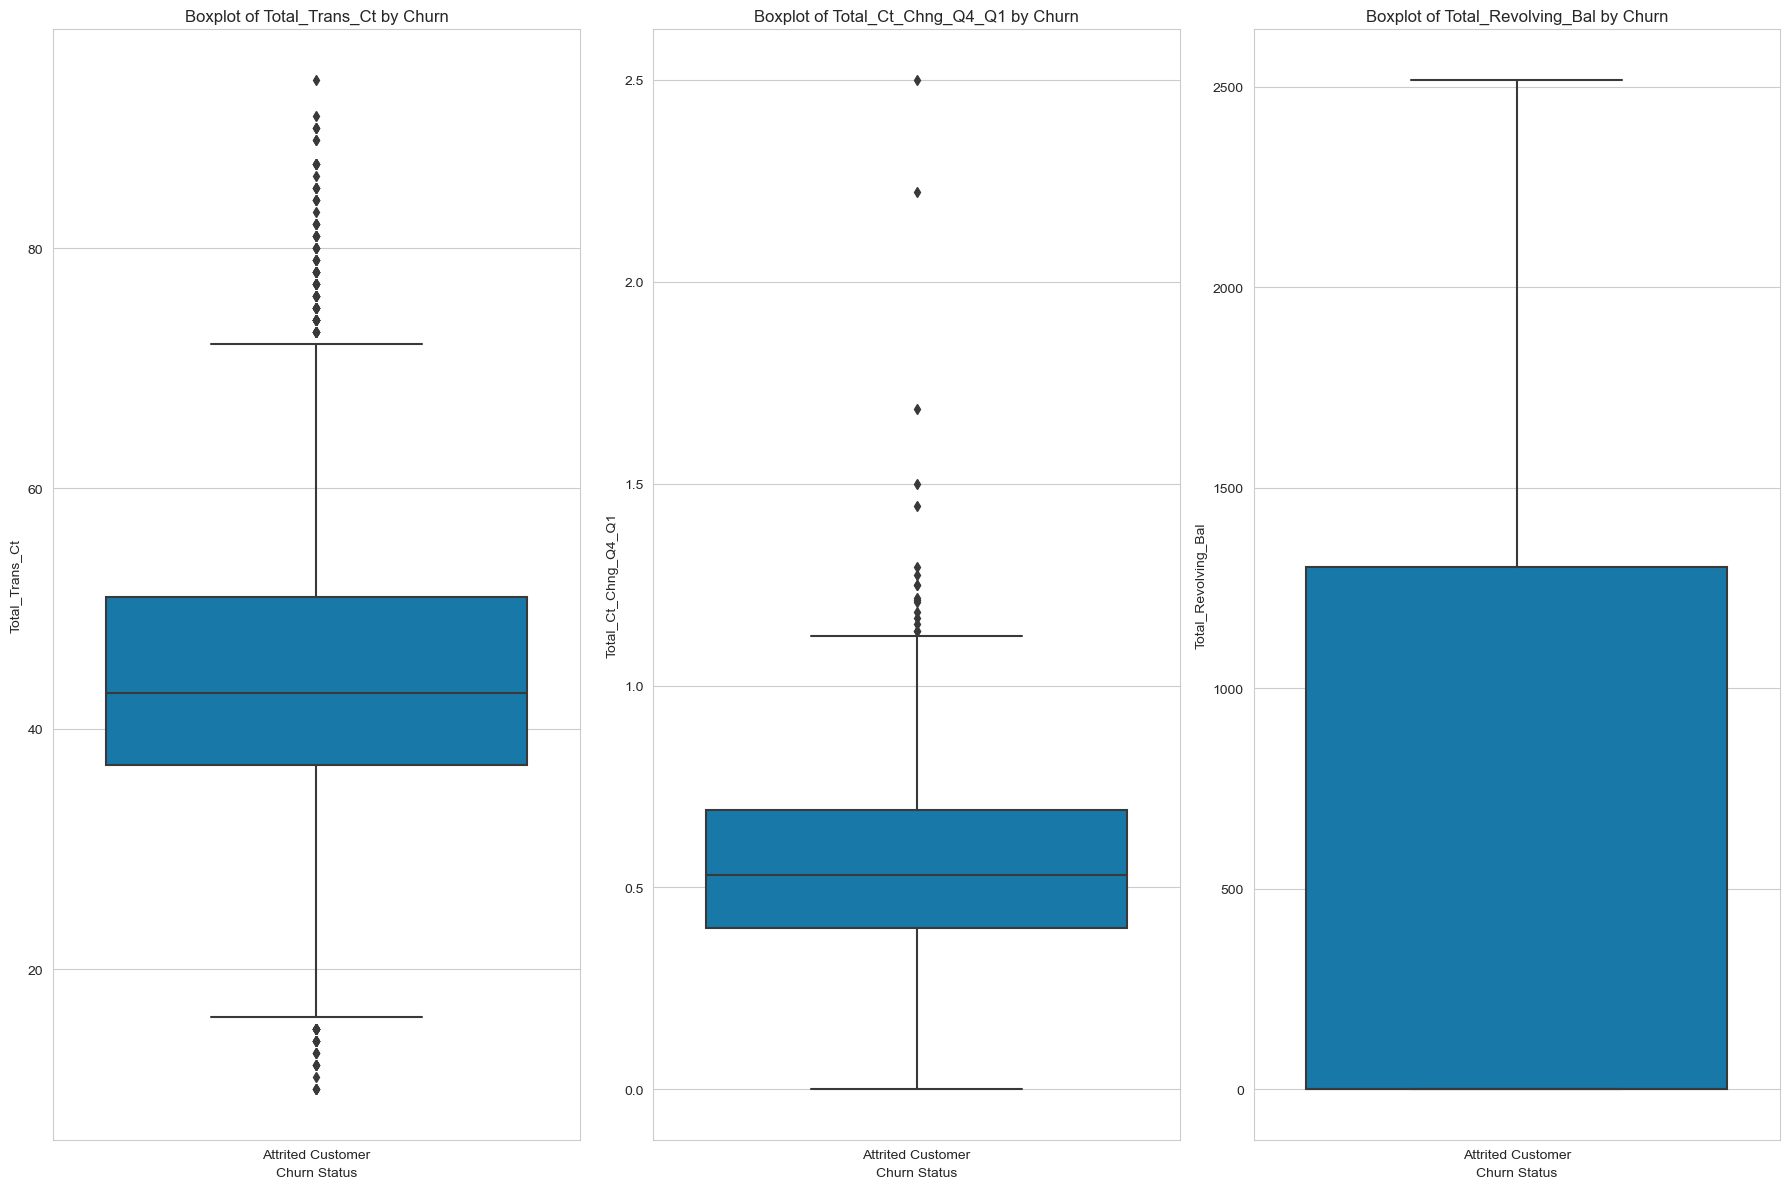

In [58]:


fig, axes = plt.subplots(1, 3, figsize=(18, 12))

for ax, feature in zip(axes, features):
    sns.boxplot(data=churned_df, x='Attrition_Flag', y=feature, ax=ax, palette="winter")
    ax.set_title(f"Boxplot of {feature} by Churn")
    ax.set_xlabel("Churn Status")
    ax.set_ylabel(feature)


plt.tight_layout()
plt.show()


#### revolving balance

 is the sum of all unpaid balances on your revolving credit accounts, This amount carries over to the next cycle and accrues interest, which is why it's important to pay it down to avoid high interest charges 
 - that's why many customers have 0 revolving balance

In [ ]:
churned_df['Total_Revolving_Bal'].describe()

count    1627.000000
mean      672.822987
std       921.385582
min         0.000000
25%         0.000000
50%         0.000000
75%      1303.500000
max      2517.000000
Name: Total_Revolving_Bal, dtype: float64

In [17]:
churned_df['Total_Revolving_Bal'].value_counts()

0       893
2517    158
710       3
458       3
1381      3
       ... 
2007      1
170       1
284       1
471       1
1961      1
Name: Total_Revolving_Bal, Length: 514, dtype: int64

<AxesSubplot:>

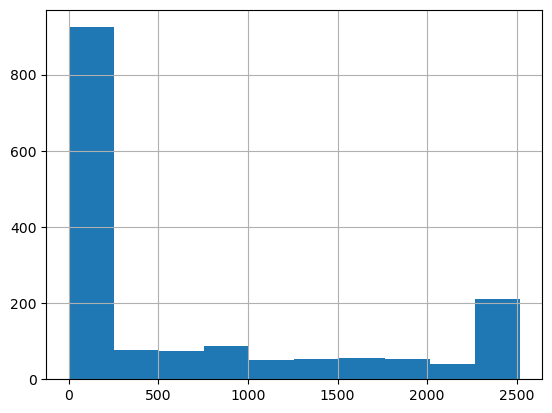

In [18]:
churned_df['Total_Revolving_Bal'].hist(
    
)

### overview on churn rates

C:\Users\polab\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 9 (	) missing from current font.



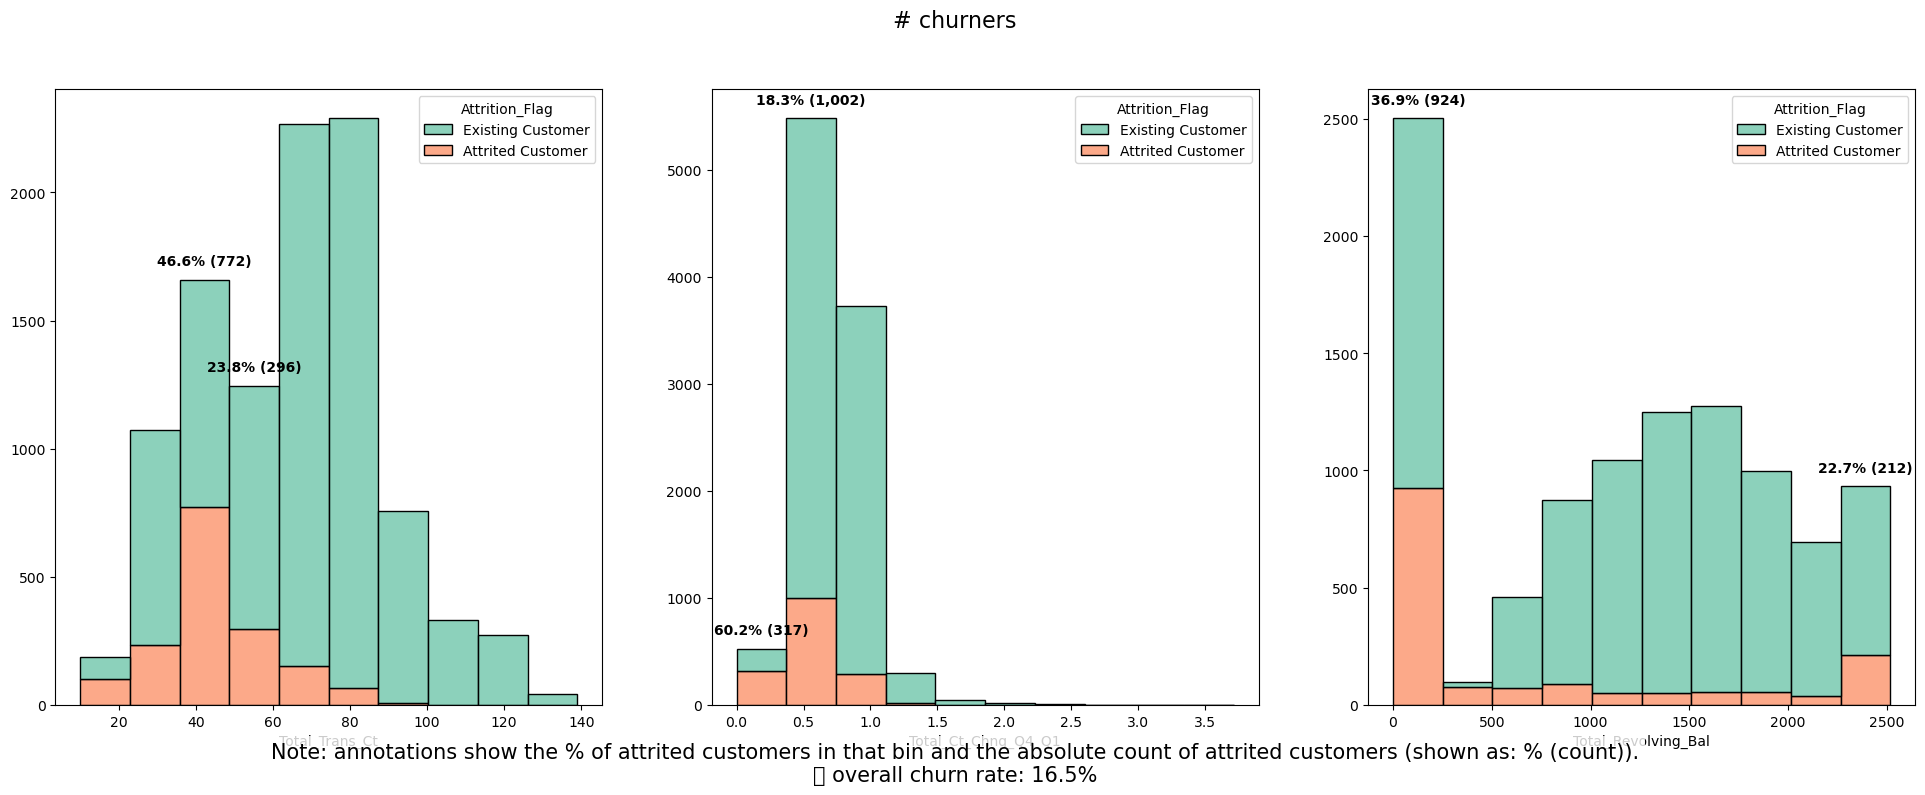

In [21]:
#setting the plot
fig, axes = plt.subplots(figsize=(24,8),nrows=1,ncols=3)
# Plot boxplots for each feature vs churn (static)
for ax, feature in zip(axes, features):
     sns.histplot(data=df,x=feature,ax=ax,bins=10,hue='Attrition_Flag',palette='Set2',multiple='stack')
     ax.set_ylabel('')
     
# customize plot
fig.suptitle('# churners',fontsize=16)

# annotate the highest 2 bars on each subplot
for ax, feature in zip(axes, features):
     # consistent binning to match the plotted histograms
     data = df[feature].dropna()
     bins = np.histogram_bin_edges(data, bins=10)

     # counts per bin for each attrition group
     attr = df[df['Attrition_Flag'] == 'Attrited Customer'][feature].dropna()
     exist = df[df['Attrition_Flag'] == 'Existing Customer'][feature].dropna()
     attr_counts, _ = np.histogram(attr, bins=bins)
     exist_counts, _ = np.histogram(exist, bins=bins)
     total_counts = attr_counts + exist_counts

     if total_counts.size == 0 or total_counts.sum() == 0:
          continue

     # pick the top 2 bins by attrited customers (or fewer if not available)
     top_n = min(2, attr_counts.size)
     top_idx = np.argsort(attr_counts)[::-1][:top_n]

     y_ref = total_counts.max()
     for idx in top_idx:
          if total_counts[idx] == 0:
               continue
          x_center = (bins[idx] + bins[idx + 1]) / 2
          pct = attr_counts[idx] / total_counts[idx] * 100
          ax.text(
               x_center,
               total_counts[idx] + y_ref * 0.02,
               f"{pct:.1f}% ({int(attr_counts[idx]):,})",
               ha='center',
               va='bottom',
               fontsize=10,
               fontweight='bold',
               color='black'
          )

# Add a single explanatory note (shown once, centered under the figure)
fig.text(0.5, 0.01, "Note: annotations show the % of attrited customers in that bin and the absolute count of attrited customers (shown as: % (count)).\n\t overall churn rate: 16.5%", 
         ha='center', va='bottom', fontsize=15, bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.show()


In [25]:
for feature in features:
    fig = px.histogram(data_frame=df,x=feature,color='Attrition_Flag',nbins=20)
    fig.update_traces(marker=dict(line=dict(color='black', width=1)))
    fig.show()

the most important segments to target based on each feature:

    1. total transaction count respectively:
        - customers with 0-9 transactions
       
        - customers with 40-49 transactions
        - customers with 30-49 transactions
        - customers with 50-59 transactions
        - customers with 40-49 transactions
        - customers with 10-19 transactions

    2. total ct change q4 q1 respectively:
        customers with <= 0.5 change
    3. total revolving balance respectively:
        - customers with <500 revolving balance


### more detailed analysis

In [15]:
for feature in ["Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", "Total_Revolving_Bal"]:
    fig = px.strip(
        df,
        y="Attrition_Flag",
        x=feature,
        color="Attrition_Flag",
        title=f"1D Scatter Plot of {feature.replace('_', ' ')} by Churn Status",
        hover_data=["Customer_Age", "Credit_Limit"],
        stripmode="overlay"  # overlay groups for better comparison
    )
    fig.show()


In [6]:
# Summary statistics with pivot table style
agg_funcs = ['mean', 'median', 'std', 'min', 'max']

summary_stats = (
    df.pivot_table(
        index=['Attrition_Flag'],
        values=features,
        aggfunc=agg_funcs
    )
    .round(2)
)

# Reorder to show Feature + Churn group in rows
summary_stats = summary_stats.stack(level=0).swaplevel().sort_index()

summary_stats


Total_Ct_Chng_Q4_Q1  Total_Revolving_Bal  \
       Attrition_Flag                                                
max    Attrited Customer                 2.50              2517.00   
       Existing Customer                 3.71              2517.00   
mean   Attrited Customer                 0.55               672.82   
       Existing Customer                 0.74              1256.60   
median Attrited Customer                 0.53                 0.00   
       Existing Customer                 0.72              1364.00   
min    Attrited Customer                 0.00                 0.00   
       Existing Customer                 0.03                 0.00   
std    Attrited Customer                 0.23               921.39   
       Existing Customer                 0.23               757.75   

                          Total_Trans_Ct  
       Attrition_Flag                     
max    Attrited Customer           94.00  
       Existing Customer          139.00  
mean   Attrited Customer           44.93  
       Existing Customer           68.67  
median Attrited Customer           43.00  
       Existing Customer           71.00  
min    Attrited Customer           10.00  
       Existing Customer           11.00  
std    Attrited Customer           14.57  
       Existing Customer           22.92

# card category churn analysis

In [28]:

pivot_card = pd.pivot_table(
    churned_df,
    index='Card_Category',
    values='CLIENTNUM',
    aggfunc='count'
).rename(columns={'CLIENTNUM': 'churners'})

group_totals = df.groupby('Card_Category')['CLIENTNUM'].count()
pivot_card['total_in_group'] = group_totals
pivot_card['churn_rate'] = (pivot_card['churners'] / pivot_card['total_in_group'] * 100).round(2)
pivot_card['pct_of_total_churners'] = (pivot_card['churners'] / total_churners * 100).round(2)

pivot_card = pivot_card.sort_values('churners', ascending=False)
pivot_card


churners  total_in_group  churn_rate  pct_of_total_churners
Card_Category                                                             
Blue               1519            9436       16.10                  93.36
Silver               82             555       14.77                   5.04
Gold                 21             116       18.10                   1.29
Platinum              5              20       25.00                   0.31

### seaborn.

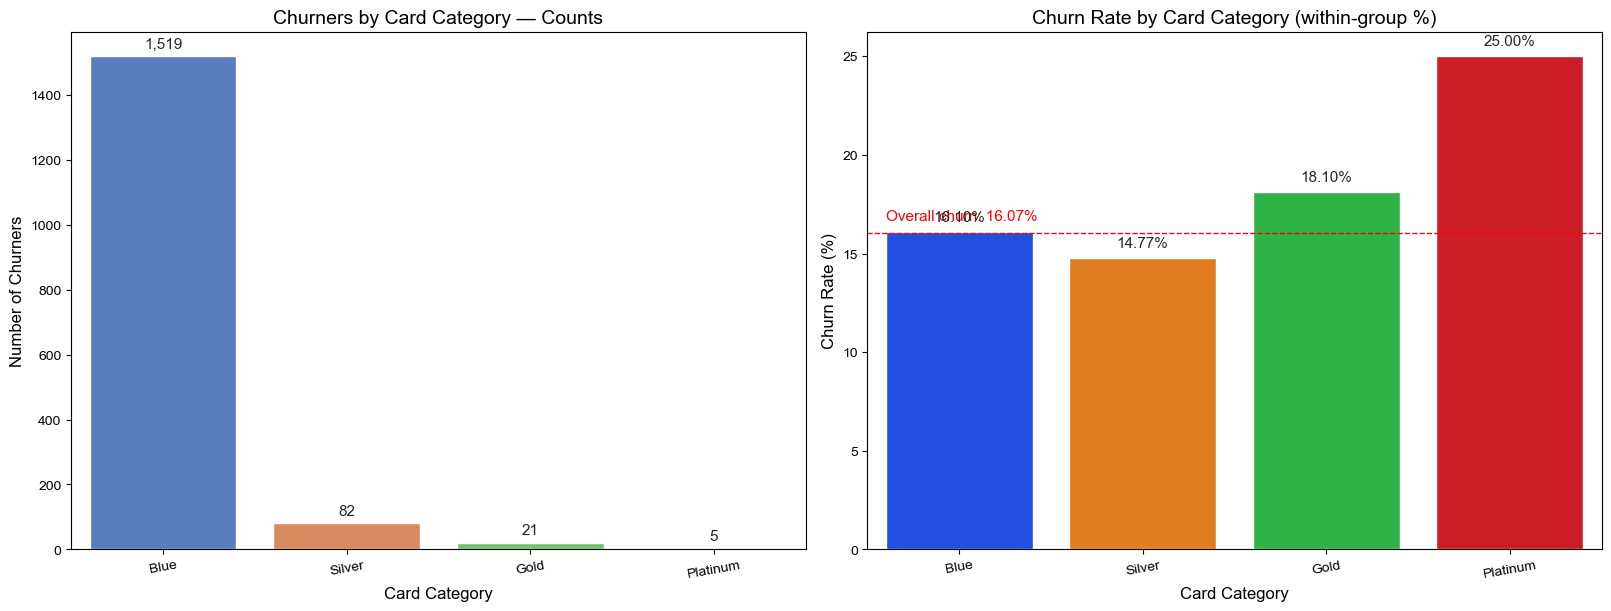

In [ ]:

# Cell: static seaborn plots for Card_Category — counts and within-group churn rate
fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)
sns.set_style("whitegrid")
data_card = pivot_card.reset_index()

# Left: churners counts
ax = axes[0]
sns.barplot(x='Card_Category', y='churners', data=data_card, palette='muted', ax=ax)
ax.set_title("Churners by Card Category — Counts", fontsize=14)
ax.set_xlabel("Card Category", fontsize=12)
ax.set_ylabel("Number of Churners", fontsize=12)
ax.tick_params(axis='x', rotation=10)
for i, row in data_card.iterrows():
    ax.text(i, row['churners'] + max(data_card['churners']) * 0.01,
            f"{int(row['churners']):,}", ha='center', va='bottom', fontsize=11)

# Right: churn rate within group
ax = axes[1]
sns.barplot(x='Card_Category', y='churn_rate', data=data_card, palette='bright', ax=ax)
ax.set_title("Churn Rate by Card Category (within-group %)", fontsize=14)
ax.set_xlabel("Card Category", fontsize=12)
ax.set_ylabel("Churn Rate (%)", fontsize=12)
ax.tick_params(axis='x', rotation=10)
baseline = len(churned_df) / len(df) * 100
ax.axhline(baseline, color='red', linestyle='--', linewidth=1)
ax.text(-0.4, baseline + 0.6, f"Overall churn: {baseline:.2f}%", color='red', fontsize=11)
for i, row in data_card.iterrows():
    ax.text(i, row['churn_rate'] + 0.4, f"{row['churn_rate']:.2f}%", ha='center', va='bottom', fontsize=11)

plt.show()


### plotly

In [29]:

# Cell: interactive Plotly overview for Card_Category (counts & churn rate)
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Churners by Card Category (count & share)",
                                    "Churn Rate by Card Category (within-group %)"))

# left: counts with pct_of_total_churners
fig.add_trace(
    go.Bar(
        x=pivot_card.index,
        y=pivot_card['churners'],
        text=pivot_card['churners'].map("{:,}".format),
        customdata=pivot_card[['pct_of_total_churners']].values,
        hovertemplate="<b>%{x}</b><br>Churners: %{y:,}<br>Share of total churners: %{customdata[0]}%"
    ),
    row=1, col=1
)

# right: churn rate (percent)
fig.add_trace(
    go.Bar(
        x=pivot_card.index,
        y=pivot_card['churn_rate'],
        text=pivot_card['churn_rate'].map(lambda v: f"{v:.2f}%"),
        hovertemplate="<b>%{x}</b><br>Churn Rate: %{y:.2f}%"
    ),
    row=1, col=2
)

baseline = len(churned_df) / len(df) * 100
fig.add_hline(y=baseline, line=dict(color="blue", dash="dash"), row=1, col=2)
fig.add_annotation(x=0.46, y=baseline, xref='x2 domain', yref='y2',
                   text=f"Overall churn: {baseline:.2f}%", showarrow=False,
                   font=dict(color="blue", size=12), xanchor='right', yshift=22)

fig.update_layout(template="plotly_white",
                  title_text="Card Category Churn Overview",
                  width=900, height=450, showlegend=False)

fig.update_xaxes(tickfont=dict(size=11))
fig.update_yaxes(title_text="Churners", row=1, col=1)
fig.update_yaxes(title_text="Churn Rate (%)", row=1, col=2)

fig.show()


almost all the churns happens in the blue card category

although only 1 platinum card customer churned out of 5, it might be significant loss due to the high value of platinum card customers

# Age group churn analysis

In [35]:
df['Age_Group'].value_counts()

36-45    4011
46-55    3907
55+      1069
26-35    1062
Name: Age_Group, dtype: int64

In [44]:
# Pivot table: Age Group as rows, number of churners and percentage of total churners as values
pivot_agegroup = pd.pivot_table(
    churned_df,
    index='Age_Group',
    values='CLIENTNUM',
    aggfunc='count'
).rename(columns={'CLIENTNUM': 'churners'})
# add total per age group and churn rate (percentage of that age group who churned)
group_totals = df.groupby('Age_Group')['CLIENTNUM'].count()
pivot_agegroup['total_in_group'] = group_totals
pivot_agegroup['churn_rate'] = (pivot_agegroup['churners'] / pivot_agegroup['total_in_group'] * 100).round(2)

pivot_agegroup['pct_of_total_churners'] = (pivot_agegroup['churners'] / total_churners * 100).round(2)

# Sort for readability
pivot_agegroup = pivot_agegroup.sort_values('churners', ascending=False)


pivot_agegroup

churners  total_in_group  churn_rate  pct_of_total_churners
Age_Group                                                             
36-45           664            4011       16.55                  40.81
46-55           649            3907       16.61                  39.89
55+             168            1069       15.72                  10.33
26-35           140            1062       13.18                   8.60

## plotly

In [47]:



fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Churners by age ","churnrate by age (within-group %)"))

# left: churners count with secondary text showing pct_of_total_churners
fig.add_trace(
    go.Bar(
        x=pivot_agegroup.index,
        y=pivot_agegroup['churners'],
        text=pivot_agegroup['churners'].map("{:,}".format),
        hovertemplate="<b>%{x}</b><br>Churners: %{y:,}<br>Share of total churners: %{customdata[0]}%",
        customdata=pivot_agegroup[['pct_of_total_churners']].values,
        marker_color=['#4C78A8', '#F58518']
    ),
    row=1, col=1
)

# right: churn rate
fig.add_trace(
    go.Bar(
        x=pivot_agegroup.index,
        y=pivot_agegroup['churn_rate'],
        text=pivot_agegroup['churn_rate'].map(lambda v: f"{v:.2f}%"),
        hovertemplate="<b>%{x}</b><br>Churn Rate: %{y:.2f}%",
        marker_color=['#54A24B', '#E45756']
    ),
    row=1, col=2
)

# add overall baseline churn as a horizontal line in the second subplot
fig.add_hline(y=baseline, line=dict(color="red", dash="dash"), row=1, col=2)
fig.add_annotation(
    x=0.46, y=baseline,
    xref='x2 domain', yref='y2',
    text=f"Overall churn: {baseline:.2f}%",
    showarrow=False,
    font=dict(color="red"),
    xanchor='right',
    yshift=22 # move annotation slightly down (pixels)
)

fig.update_layout(
    template="plotly_white",
    title_text="Age Group Churn Overview — Counts & Within-Group Rates",
    width=850,
    height=450,
    showlegend=False
)
fig.update_yaxes(title_text="Churners", row=1, col=1)
fig.update_yaxes(title_text="Churn Rate (%)", row=1, col=2)

fig.show()

most churs happens for customers aged 36-55

In [6]:
fig = px.histogram(data_frame=df,x='Customer_Age',color='Attrition_Flag',nbins=25)
fig.update_traces(marker=dict(line=dict(color='black', width=1)))
fig.show()

In [6]:
df.to_csv('../data/processed/bank_churners_complete.csv', index=False)
churned_df.to_csv('../data/processed/bank_churners_churned.csv', index=False)

# Executive Conclusion — Key Findings & Actions

Summary (top signals):
- Income: "Less than $40K" contributes the largest share of churn (≈37% of churners) and shows elevated within‑group churn → priority segment.
- Activity: Low transaction volume (Total_Trans_Ct ≤ 9) is a strong early warning signal for churn → high‑priority re‑engagement target.
- Education: Graduates and certain postgraduate groups show higher absolute churn counts; doctorate shows high rate but small N → investigate sample size.
- Card Category: Blue card holds the bulk of churners; Platinum churns are rare but potentially high value (monitor individually).
- Demographics: Females slightly more likely to churn than males (small effect).
- Financial behavior: Total_Trans_Ct, Total_Ct_Chng_Q4_Q1 and Total_Revolving_Bal are the strongest numerical correlates with churn (use for scoring).

Recommended, focused actions (short-term pilots):
1) Retention pilot for "Less than $40K": targeted offers + outreach (measure lift, aim −20% churn vs control).
2) Re‑engagement for low transactors (Total_Trans_Ct ≤ 9): low‑cost incentives and product nudges to increase activity.
3) High‑value customer protection: flag Platinum customers for proactive, personalized retention (concierge outreach).
4) Use the top categorical and numerical signals to build a simple risk score (quick model) for prioritized outreach.

Operational next steps (data & delivery):
- Export segment lists from pivot tables: pivot_income, pivot_card, pivot_agegroup, pivot_gender.
- Run A/B tests for the two pilots above, track churn rate and transactions uplift at 30/90 days.
- Investigate small‑N, high‑rate groups (e.g., doctorate) before broad action — validate with more data.

One‑line takeaway: Prioritize low‑income and low‑activity customers for immediate retention experiments; protect high‑value platinum customers with personalized outreach while using simple risk scoring to focus limited retention resources.